<a href="https://www.kaggle.com/code/huseyincosgun/fitness-market-analysis?scriptVersionId=164229457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', palette='Pastel2')
import os
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_file(filepath, plot = True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'. Generate a line plot using Seaborn to visualize the data. This corresponds to the first graphic (time series) returned by trends.google.com. 
    """
    file = pd.read_csv(filepath, header=1)
    df = file.set_index('Week').stack().reset_index()
    df.columns = ['week','region','interest']
    df['week'] = pd.to_datetime(df['week'])
    plt.figure(figsize=(8,3))
    df = df[df['interest']!="<1"]
    df['interest'] = df['interest'].astype(float)

    if plot:
        sns.lineplot(data = df, x= 'week', y= 'interest',hue='region')
    return df

In [3]:
def read_geo(filepath, multi=False):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with two columns: 'country' and 'interest'. Generate a bar plot using Seaborn to visualize the data. This corresponds to the second graphic returned by trends.google.com. Use multi=False if only one keyword is being analyzed, and multi=True if more than one keyword is being analyzed.
    """
    file = pd.read_csv(filepath, header=1)

    if not multi:
        file.columns = ['country', 'interest']
        plt.figure(figsize=(8,4))
        sns.barplot(data = file.dropna().iloc[:25,:], y = 'country', x='interest')

    if multi:
        plt.figure(figsize=(3,8))
        file = file.set_index('Country').stack().reset_index()
        file.columns = ['country','category','interest']
        file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
        sns.barplot(data=file.dropna(), y = 'country', x='interest', hue='category')

    file = file.sort_values(ascending=False,by='interest')
    return file

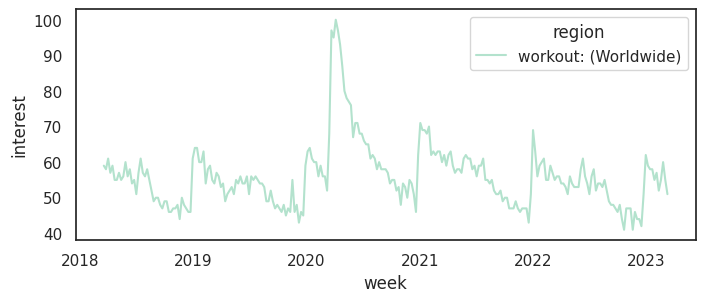

In [4]:
# 1. Load data on global interest in fitness
workout = read_file('/kaggle/input/dataset1/workout.csv')

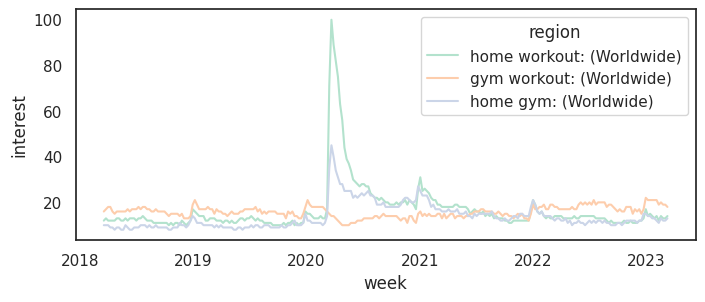

In [5]:
# 2. Compare interest in home workouts, gym workouts and home gyms
workout = read_file('/kaggle/input/dataset1/three_keywords.csv') # This will create a lineplot
current = 'gym workout'
peak_covid = 'home workout'

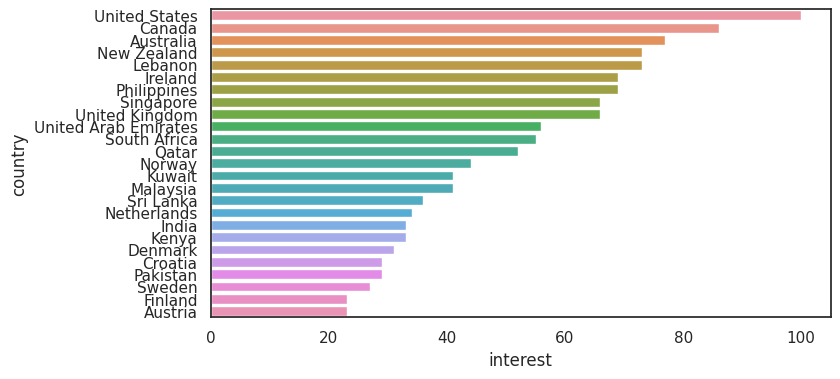

In [6]:
# 3. Segment global interest by region
workout_global = read_geo('/kaggle/input/dataset1/workout_global.csv')
top_25_countries = workout_global.head(25)
top_country = top_25_countries['country'].iloc[0]

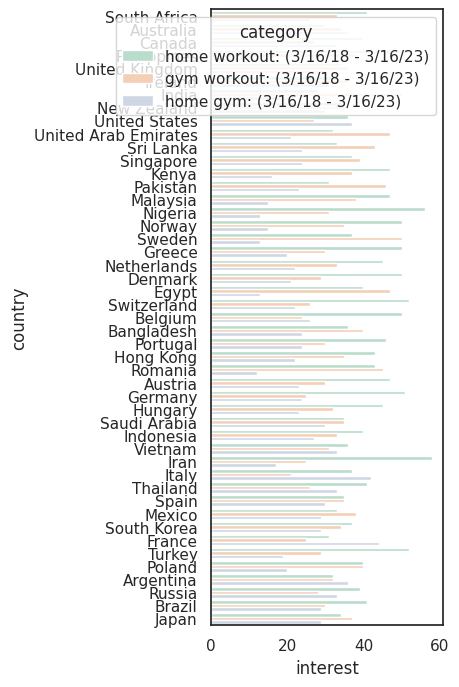

In [7]:
# 4. Assessing regional demand for home workouts, gym workouts and home gyms
geo_categories = read_geo('/kaggle/input/dataset1/geo_three_keywords.csv', multi=True)
MESA_countries = ["Philippines", "Singapore", "United Arab Emirates", "Qatar", "Kuwait", "Malaysia", "Sri Lanka", "India", "Pakistan", "Lebanon"]
MESA = geo_categories.loc[geo_categories.country.isin(MESA_countries), :]

In [8]:
# 5. Assess the split of interest by country and category
MESA.set_index(['country','category']).unstack()
top_home_workout_country = 'Philippines'

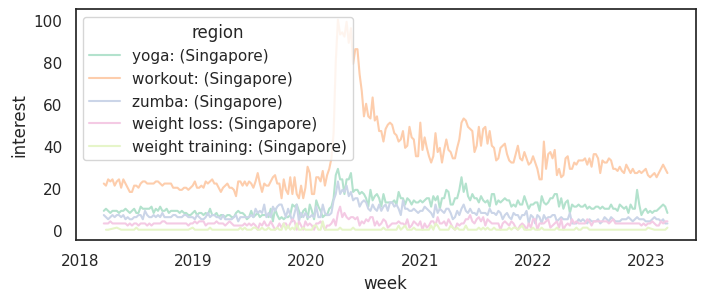

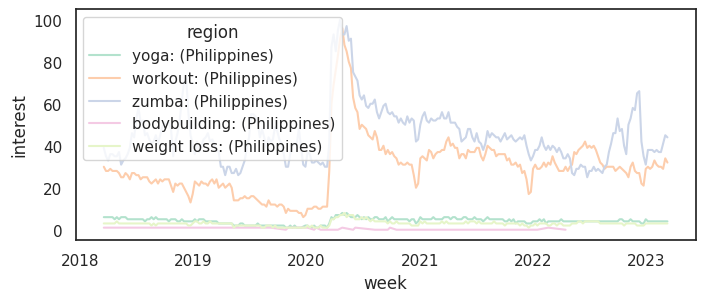

In [9]:
# 6. A deeper dive into two countries
read_file('/kaggle/input/dataset1/yoga_zumba_sng.csv')
read_file('/kaggle/input/dataset1/yoga_zumba_phl.csv')
pilot_content = ['yoga', 'zumba']